In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.solver import Solver
from cs231n.classifiers.cnn import *


%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

input layer had mean -0.000679 and std 1.001687
hidden layer 1 had mean 1.790444 and std 2.622767
hidden layer 2 had mean 7.971067 and std 11.731971
hidden layer 3 had mean 35.162369 and std 49.939181
hidden layer 4 had mean 44.021663 and std 66.241085
hidden layer 5 had mean 64.982765 and std 90.090107
hidden layer 6 had mean 81.980496 and std 118.886168
hidden layer 7 had mean 90.335872 and std 160.017099
hidden layer 8 had mean 126.046196 and std 198.634223
hidden layer 9 had mean 161.932624 and std 254.224817
hidden layer 10 had mean 265.682728 and std 388.790168
input layer had mean -0.000679 and std 1.001687
hidden layer 1 had mean 0.001865 and std 4.488875
hidden layer 2 had mean -0.172984 and std 20.224245
hidden layer 3 had mean 0.570649 and std 87.904934
hidden layer 4 had mean -8.240473 and std 119.951383
hidden layer 5 had mean 7.651782 and std 151.943863
hidden layer 6 had mean -3.553090 and std 217.910154
hidden layer 7 had mean -49.730088 and std 295.612202
hidden layer 

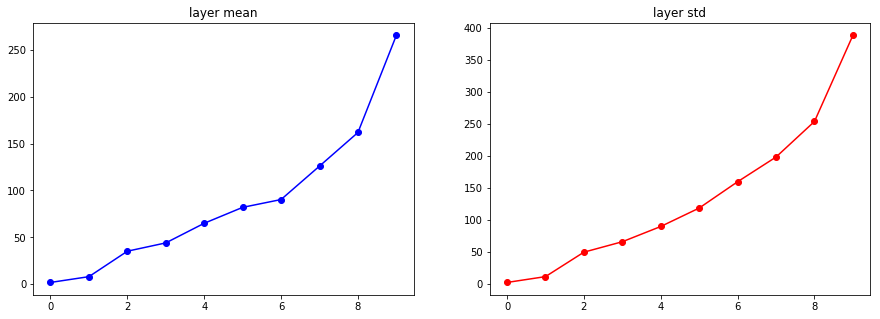

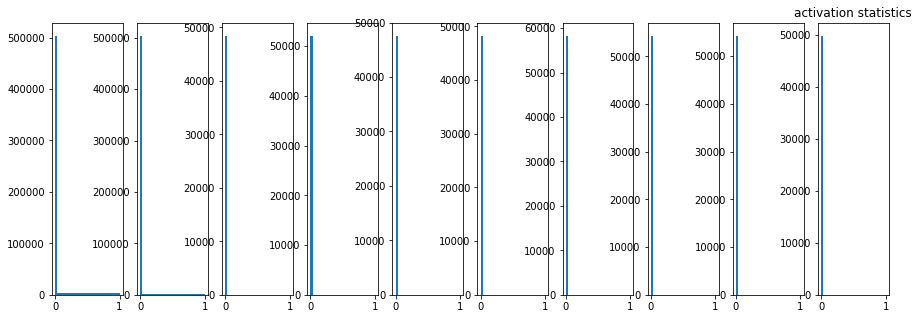

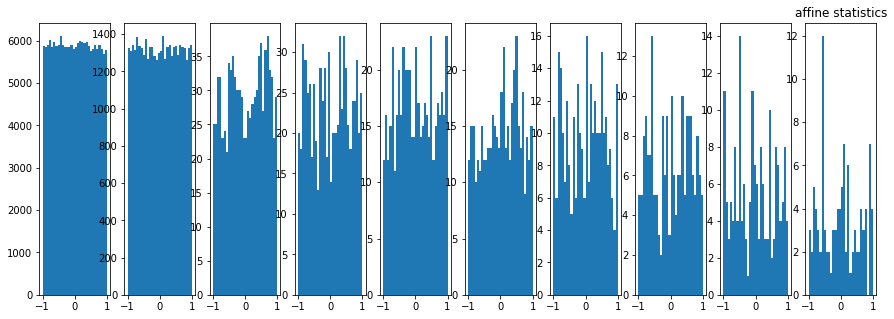

In [3]:
D = np.random.randn(1000,500)
hidden_layer_sizes = [1000]*2
hidden_layer_sizes.extend([100]*8)

nonlinearities = ['relu']*len(hidden_layer_sizes)

act = {'relu':lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x), 'none':lambda x:x}

#weight_scale = [0.04472]*3
#weight_scale.extend([0.1414]*7)

#weight_scale = [0.06324, 0.04472, 0.04472]
#weight_scale.extend([0.1414]*7)

weight_scale = [0.2]*10

Hs = {}
Ha = {}
for i in xrange(len(hidden_layer_sizes)):
    X  = D if i==0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = weight_scale[i]*np.random.randn(fan_in ,fan_out)
    Ha[i] = X.dot(W)
    Hs[i] = act[nonlinearities[i]](X.dot(W))
    
# activation distributions for each layer
print 'input layer had mean %f and std %f' % (np.mean(D),np.std(D))
layer_means = [np.mean(Hs[i]) for i in xrange(len(hidden_layer_sizes))]
layer_stds = [np.std(Hs[i]) for i in xrange(len(hidden_layer_sizes))]
for i in xrange(len(hidden_layer_sizes)):
    print 'hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i])    

    
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

plt.figure()
for i, H in Hs.iteritems():
    plt.subplot(1,len(hidden_layer_sizes), i+1)
    plt.hist(H.ravel(), 30, range=(0,1))
plt.title('activation statistics')

# affine distributions for each layer
print 'input layer had mean %f and std %f' % (np.mean(D),np.std(D))
layer_means = [np.mean(Ha[i]) for i in xrange(len(hidden_layer_sizes))]
layer_stds = [np.std(Ha[i]) for i in xrange(len(hidden_layer_sizes))]
for i in xrange(len(hidden_layer_sizes)):
    print 'hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i])

plt.figure()
for i, H in Ha.iteritems():
    plt.subplot(1,len(hidden_layer_sizes), i+1)
    plt.hist(H.ravel(), 30, range=(-1,1))
plt.title('affine statistics')

In [11]:
D = np.random.randn(1000000)
R = np.maximum(0,D)
relu_mu = np.mean(R)
relu_var = np.var(R)
print relu_mu, relu_var
pool = np.max(D.reshape((-1,4)),axis=1)
pool_mu = np.mean(pool)
pool_var = np.var(pool)
print pool_mu, pool_var

0.399688088641 0.34124615396
1.03188766626 0.489631203332


In [1]:
print float(1e-3)

0.001


In [4]:
data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)

('X_val: ', (1000, 3, 32, 32))
('X_train: ', (49000, 3, 32, 32))
('X_test: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('y_train: ', (49000,))
('y_test: ', (1000,))


input layer had mean 0.000912 and std 1.001174
hidden layer 1 had mean 0.000001 and std 0.073012
hidden layer 2 had mean 0.028910 and std 0.042772
hidden layer 3 had mean 0.075616 and std 0.049931
hidden layer 4 had mean -0.003071 and std 0.050119
hidden layer 5 had mean 0.018489 and std 0.028813
hidden layer 6 had mean -0.000259 and std 0.002478


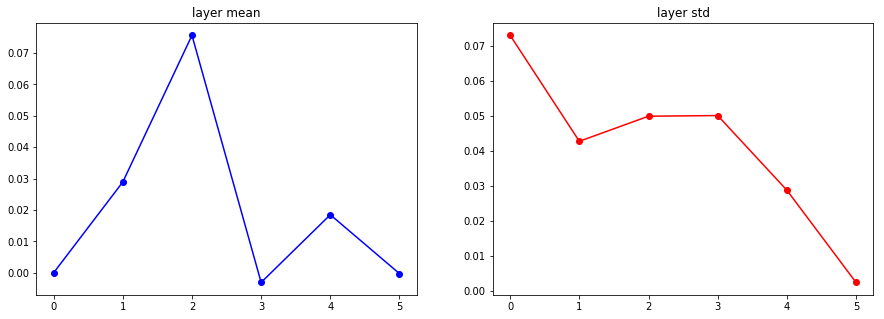

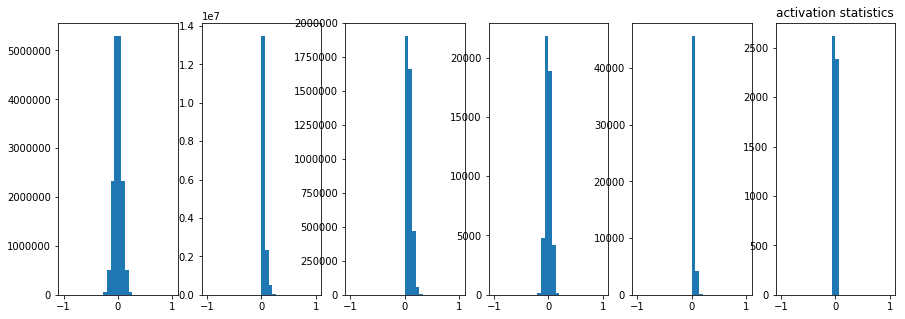

In [18]:
# Why convolution didn't worked
#np.random.seed(231)

#weight_scale = 1e-3
weight_scale = 0.006335
input_dim=(3, 32, 32)
num_filters=32
filter_size=7
hidden_dim=100
num_classes=10
reg=0.0
conv_param = {'stride': 1, 'pad': (filter_size - 1) // 2}
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

W1 = weight_scale*np.random.randn(num_filters, input_dim[0], filter_size, filter_size)
b1 = np.zeros(num_filters)
W2 = weight_scale*np.random.randn(num_filters*(input_dim[1]/2)*(input_dim[2]/2), hidden_dim)
b2 = np.zeros(hidden_dim)
W3 = weight_scale*np.random.randn(hidden_dim, num_classes)
b3 = np.zeros(num_classes)

'''
W1 = 0.08248*np.random.randn(num_filters, input_dim[0], filter_size, filter_size)
b1 = np.zeros(num_filters)
W2 = 0.01353*np.random.randn(num_filters*(input_dim[1]/2)*(input_dim[2]/2), hidden_dim)
b2 = np.zeros(hidden_dim)
W3 = 0.141421*np.random.randn(hidden_dim, num_classes)
b3 = np.zeros(num_classes)
'''
num_train = 500
small_data = np.random.randn(num_train, *input_dim)

Hs = {}
Ha = {}
Hs[0], _ = conv_forward_fast(small_data, W1, b1, conv_param)
Hs[1], _ = relu_forward(Hs[0])
Hs[2], _ = max_pool_forward_fast(Hs[1], pool_param)
Hs[3], _ = affine_forward(Hs[2], W2, b2)
Hs[4], _ = relu_forward(Hs[3])
Hs[5], _ = affine_forward(Hs[4], W3, b3)

# activation distributions for each layer
print 'input layer had mean %f and std %f' % (np.mean(small_data),np.std(small_data))
layer_means = [np.mean(Hs[i]) for i in xrange(6)]
layer_stds = [np.std(Hs[i]) for i in xrange(6)]
for i in xrange(6):
    print 'hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i])    

    
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

plt.figure()
for i, H in Hs.iteritems():
    plt.subplot(1,6, i+1)
    plt.hist(H.ravel(), 30, range=(-1,1))
plt.title('activation statistics')

In [15]:
input layer had mean -5.724192 and std 60.626389
hidden layer 1 had mean 0.058306 and std 4.245904
hidden layer 2 had mean 1.605969 and std 2.566660
hidden layer 3 had mean 2.362193 and std 2.960845
hidden layer 4 had mean 0.345081 and std 2.153339
hidden layer 5 had mean 1.028743 and std 1.369658
hidden layer 6 had mean 0.042697 and std 0.110157


input layer had mean -5.724192 and std 60.626389
hidden layer 1 had mean 0.009204 and std 0.670230
hidden layer 2 had mean 0.253507 and std 0.405156
hidden layer 3 had mean 0.372880 and std 0.467379
hidden layer 4 had mean 0.008599 and std 0.053656
hidden layer 5 had mean 0.025634 and std 0.034129
hidden layer 6 had mean 0.000168 and std 0.000433


input layer had mean -5.724192 and std 60.626389
hidden layer 1 had mean 0.754705 and std 54.958825
hidden layer 2 had mean 20.787595 and std 33.222753
hidden layer 3 had mean 30.576132 and std 38.325066
hidden layer 4 had mean 9.539806 and std 59.529302
hidden layer 5 had mean 28.439716 and std 37.864355
hidden layer 6 had mean 26.349847 and std 67.982330

SyntaxError: invalid syntax (<ipython-input-15-53526d62d5a2>, line 1)